In [160]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rc_={
    "figure.dpi":600,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

In [161]:
bat_dc=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G1-bat-dc-pv0.5.xlsx'

In [162]:


def cal_relative(df):
    lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
    upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
    diff=upper_bound-lower_bound
    df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
    enhance=df[(df.p_grid_max_method=="by_execution")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]-\
        df[(df.p_grid_max_method=="minimize_cap")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]
    return enhance

In [163]:
def pivot_data(fn,keys,fn_add=None):
    all_df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
    if fn_add!=None:
        add_df=pd.read_excel(fn_add,sheet_name="Sheet1",index_col=0)
        all_df=pd.concat([all_df,add_df]) 
    all_df=all_df.reindex()
    all_df["relative_OPEX"]=None
    grouped=all_df.groupby(by=keys).apply(cal_relative)
    grouped_ehance=pd.DataFrame(grouped)
    grouped_ehance=grouped_ehance.reset_index()
    if 'B_kWh' in keys:
        grouped_ehance['B_kWh']=grouped_ehance['B_kWh']/73.6
        grouped_ehance['B_kWh']=grouped_ehance['B_kWh'].round(0)
    if 'price_dc' in keys:  
        grouped_ehance['price_dc']=grouped_ehance['price_dc']*30
        grouped_ehance['price_dc']=grouped_ehance['price_dc'].round(0)
    data=grouped_ehance.pivot(index=keys[0],columns=keys[1])
    return data[0]

dc_bat=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G1-bat-dc-pv0.5.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\bat_dc_0.xlsx',
    keys=['B_kWh','price_dc']
)
pv_dc=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G3-bat6h-dc-pv.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\pv_dc_0.xlsx',
    keys=['pv_to_bld','price_dc']
)
bat_pv=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G2-bat-dc0.6-pv.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\bat_pv_0.xlsx',
    keys=['B_kWh','pv_to_bld']
)

In [164]:
dc_bat

price_dc,0.0,3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,27.0,30.0
B_kWh,,,,,,,,,,,
0.0,-0.133684,35.010044,69.490266,22.223050,62.220368,56.090194,51.338772,93.818578,65.083636,82.718870,48.708360
1.0,-0.057308,13.134361,34.645176,49.208396,62.957619,76.764332,84.499744,91.387880,97.564129,102.105991,106.563464
2.0,0.019824,5.830843,20.479639,30.370395,43.246350,59.470442,66.613703,74.416891,80.536619,85.170564,89.744165
3.0,0.098407,1.810090,10.299209,19.665519,31.182940,49.488088,56.192663,64.564090,70.550514,75.023097,79.797129
4.0,0.083305,-1.012248,7.686031,15.329318,26.340664,41.349776,49.978185,58.191870,63.594323,68.852976,73.714277
5.0,-0.044192,-2.429877,5.728578,12.555435,20.585695,33.057983,45.712907,50.378540,59.074480,63.740540,68.560572
6.0,0.225334,-2.133310,3.507454,10.409633,18.515386,30.334815,40.457951,46.317457,52.054015,59.606368,64.360011
7.0,-0.028177,-2.174961,0.562267,8.875905,16.407212,22.726867,31.816352,41.002527,49.192542,53.256266,59.632050
8.0,-0.082746,-1.814154,-2.364076,6.168625,11.538555,19.746581,29.023558,38.306210,44.425612,50.614862,57.404785


In [165]:
bat_pv.index=bat_pv.index.astype(int)
dc_bat.index=dc_bat.index.astype(int)
dc_bat=dc_bat.T
dc_bat.index=dc_bat.index.astype(int)
dc_bat=dc_bat.T
pv_dc=pv_dc.T
pv_dc.index=pv_dc.index.astype(int)
pv_dc=pv_dc.T

In [166]:
dc_bat.columns=dc_bat.columns.astype(int)

In [167]:
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)

Text(0.5, 0.0, 'Relative regret OPEX improvement')

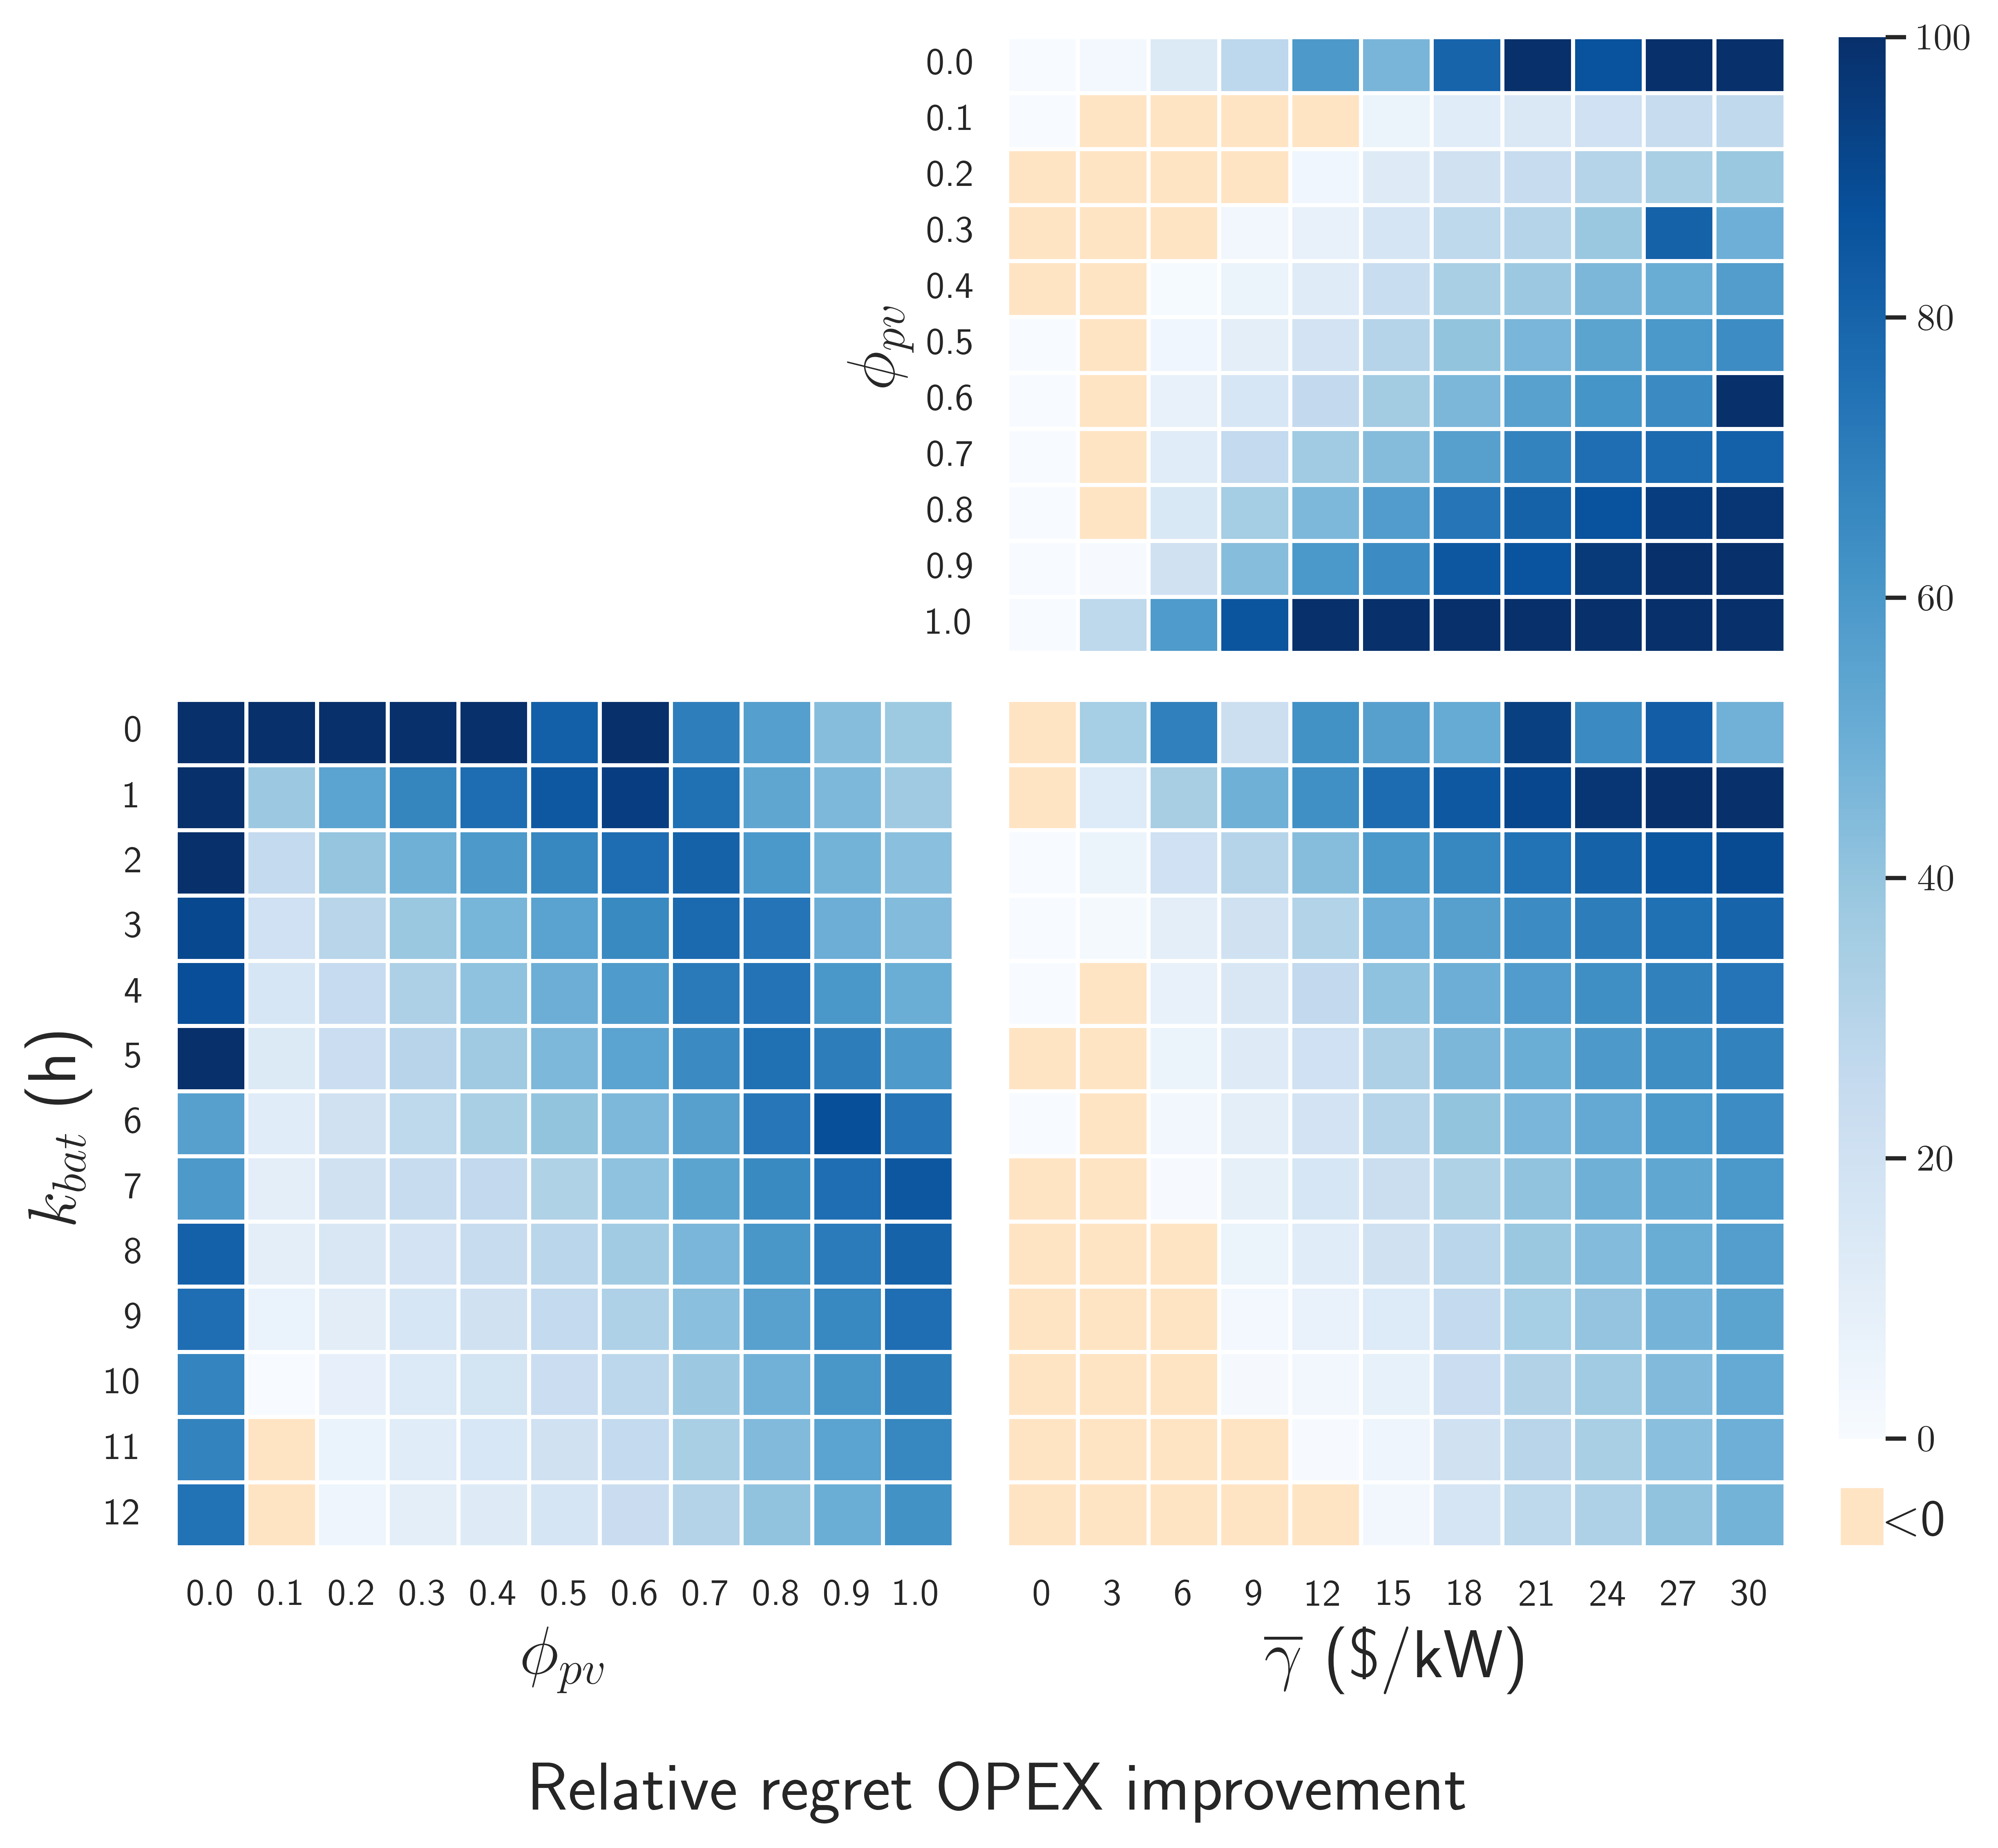

In [168]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(9, 8))  # 创建画布
grid = gridspec.GridSpec(3, 3,width_ratios=[1,1,0.06],height_ratios=[1,1.2,0.1])  # 设定2行*3列的网格
grid.update(wspace = 0.1, hspace = 0.1)
ax1 = fig.add_subplot(grid[0, 1])  # pv_dc
ax2 = fig.add_subplot(grid[1:3, 0])  # bat_pv
ax3 = fig.add_subplot(grid[1:3, 1])  # bat_dc
ax4 = fig.add_subplot(grid[0:2, 2])  # 第一行的全部列都添加到ax1中
ax5 = fig.add_subplot(grid[2, 2])  # 第一行的全部列都添加到ax1中
ax5.xaxis.set_ticks([])
ax5.yaxis.set_ticks([])
ax5.set_facecolor('bisque')
ax5.text(1,0.2,'$<$0',fontsize=15)

cmap=sns.color_palette("Blues", as_cmap=True)
#cmap.set_over('b')
cmap.set_under('bisque')

sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax2,data=bat_pv,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False) 
sns.heatmap(ax=ax3,data=dc_bat,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar_ax=ax4,yticklabels=False) 
'''sns.heatmap(ax=ax3, data=dc_bat, square=False, vmin=-5, vmax=100, cmap="RdBu", linewidths=1, cbar=False, yticklabels=False, \
    cbar_kws={"extend": "both", "extendfrac": 0, "extendrect": True, "ticks": [-0, 0, 100], "drawedges": True, \
        "boundaries": [-0, 100], "values": [-0, 100], "colors": ["black", "black"]})'''


ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax1.set_ylabel("$\phi_{pv}$",fontsize=20)
ax1.set_yticklabels(labels=ax1.get_yticklabels(),rotation=0)

ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\phi_{pv}$",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)


sns.set(font_scale=1.5)
plt.suptitle("Relative regret OPEX improvement",y=0.0,fontsize=20)

In [169]:
bat_pv

pv_to_bld,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
B_kWh,,,,,,,,,,,
0,200.287115,126.921432,111.934362,105.750228,100.001019,81.318189,113.075943,70.017735,56.793074,43.048767,37.575890
1,142.629111,38.062667,54.823043,67.532269,76.522214,84.580609,94.162761,75.055510,53.539437,45.452079,37.388004
2,136.875612,25.546735,39.593339,48.955483,59.145194,66.659038,76.462339,80.787949,59.710466,47.938675,42.576254
3,90.932036,20.395357,29.640187,38.374422,47.196540,55.224632,65.262975,78.034843,73.586538,49.885876,44.164859
4,88.320476,16.117493,25.083590,33.167169,41.180624,49.801083,58.559157,71.524578,74.212692,60.070623,50.186457
5,99.812351,13.594893,22.294717,29.702166,37.342683,45.651698,54.698467,65.023732,75.043418,70.687774,58.615850
6,56.118198,11.380781,20.122010,27.431292,34.035105,40.402281,45.630279,56.098225,72.907896,88.134525,73.084030
7,59.043467,10.066051,19.777452,24.468121,26.493827,31.858299,41.189518,54.363312,65.501692,76.013086,85.041084
8,80.946003,9.964210,15.550875,18.467128,24.204498,28.864978,36.341044,46.392221,60.331602,71.256947,80.351128


Text(0.5, -0.05, 'Relative regret reduction')

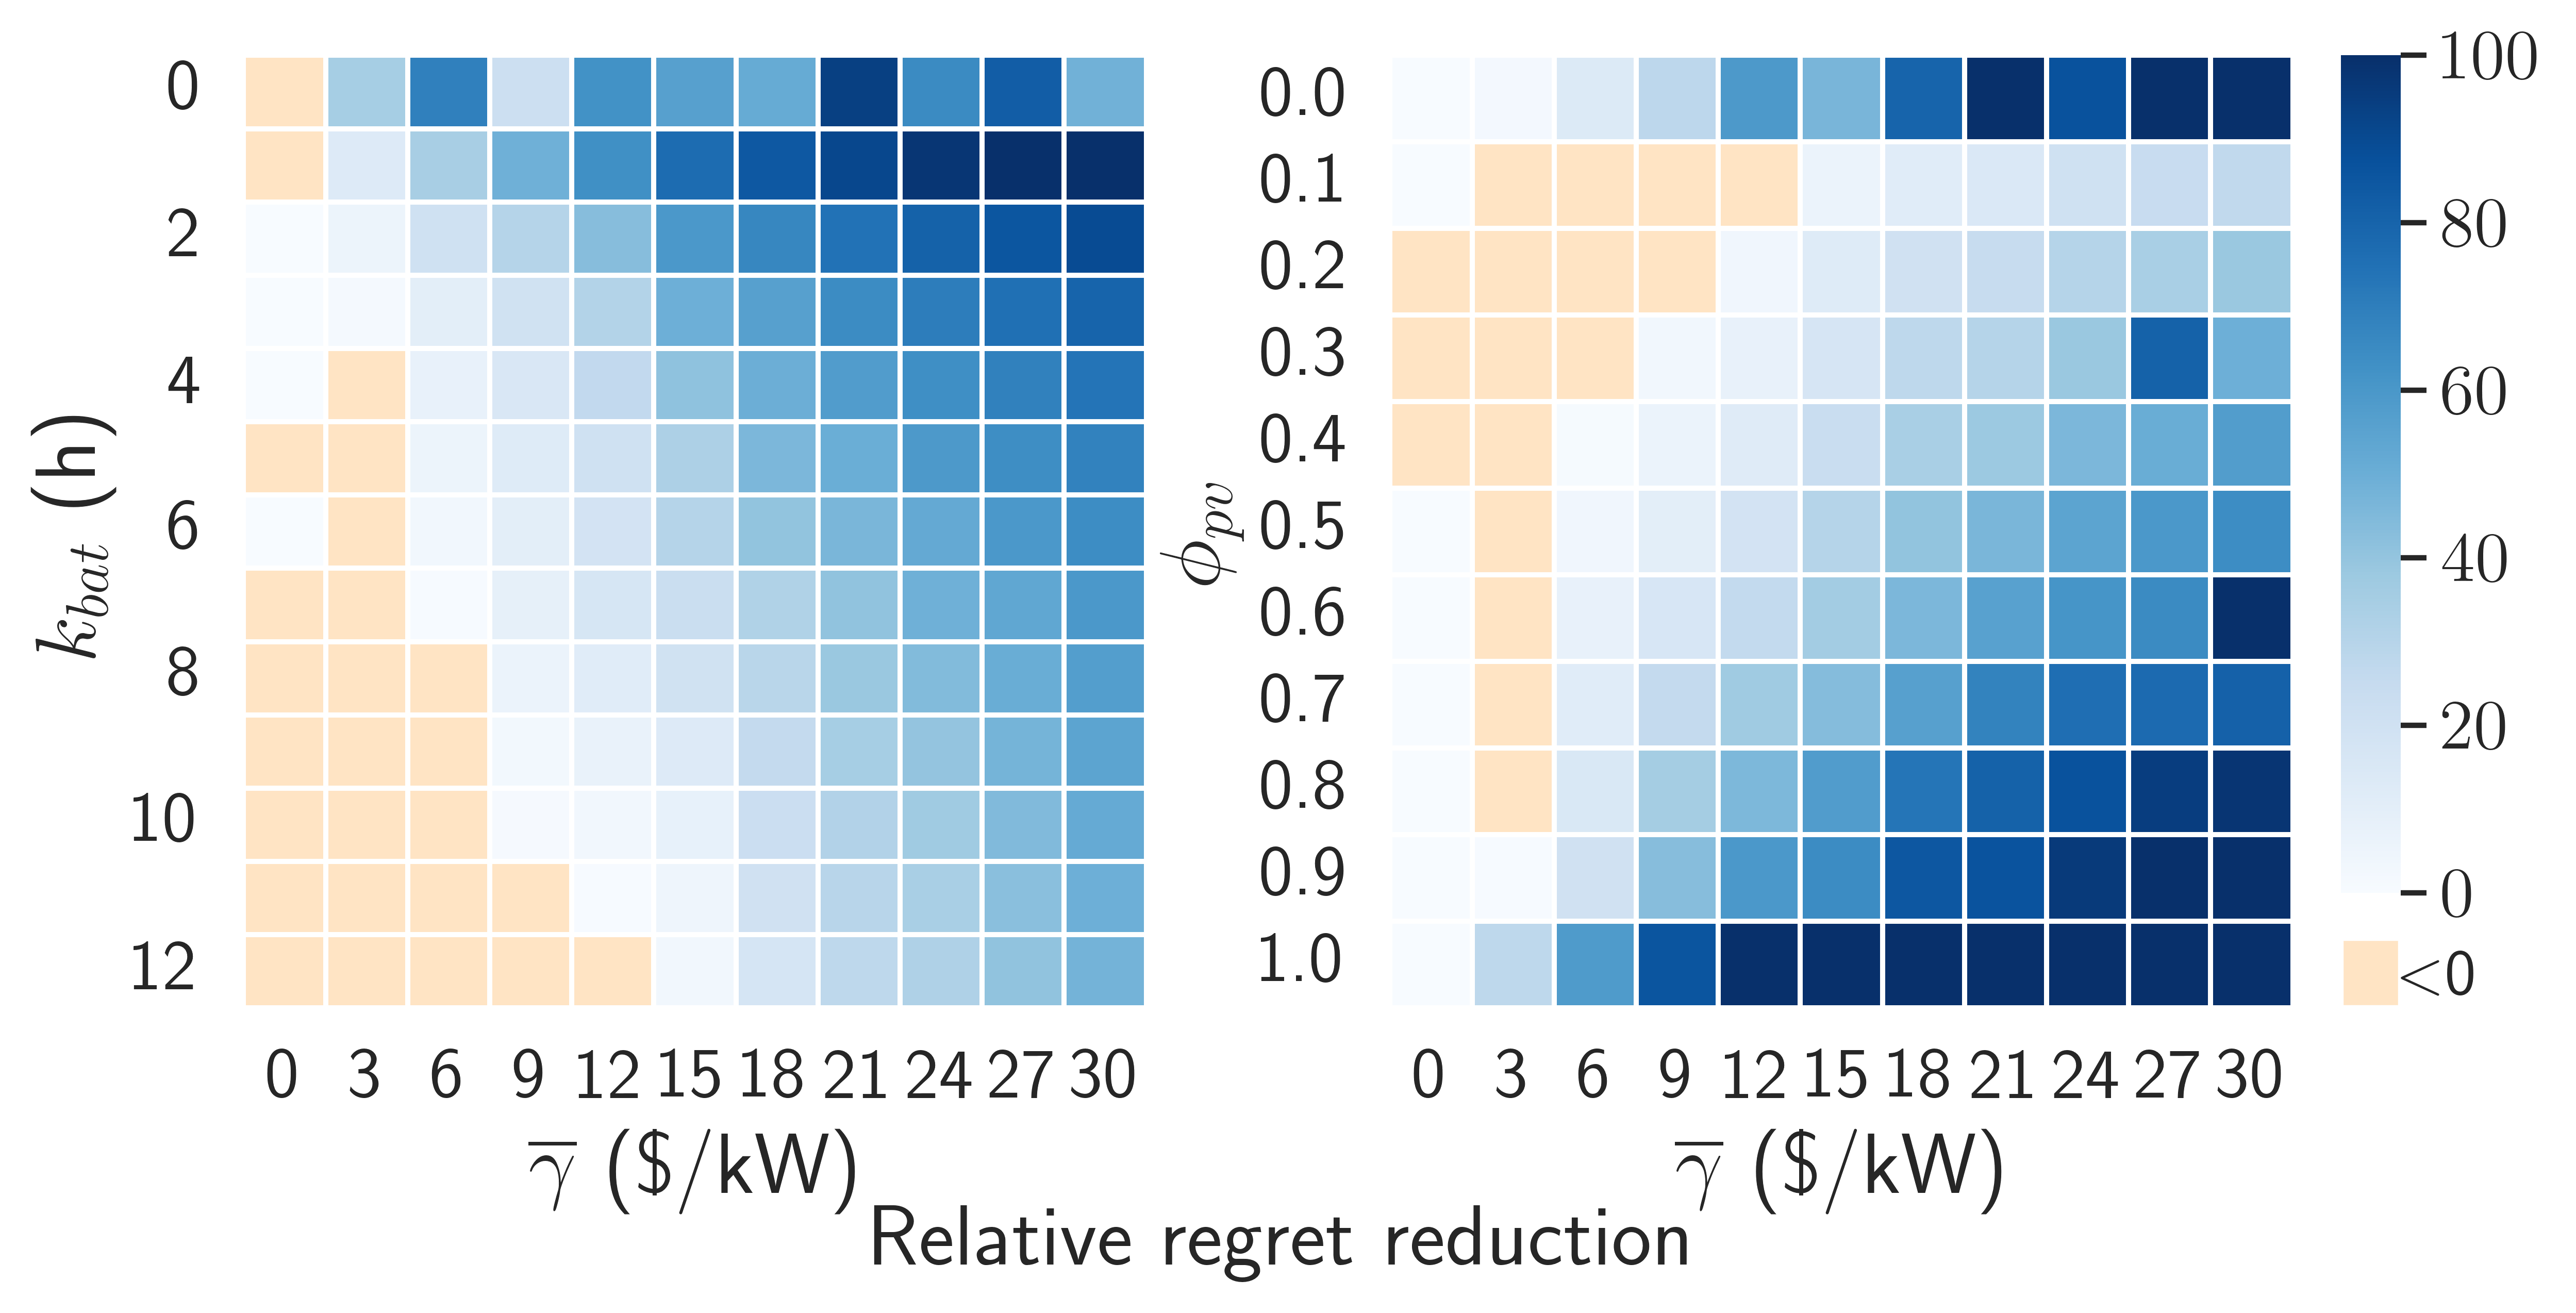

In [170]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(9, 4))  # 创建画布
grid = gridspec.GridSpec(2, 3,width_ratios=[1,1,0.06],height_ratios=[1.2,0.1])  # 设定2行*3列的网格
grid.update(wspace = 0.07, hspace = 0.1)

grid01=gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=grid[:,0:2],width_ratios=[1,1],wspace=0.27)
#ax1 = fig.add_subplot(grid[0, 1])  # pv_dc
ax2 = fig.add_subplot(grid01[:, 0])  # bat_pv
ax3 = fig.add_subplot(grid01[:, 1])  # bat_dc
ax4 = fig.add_subplot(grid[0, 2])  # 第一行的全部列都添加到ax1中
ax5 = fig.add_subplot(grid[1, 2])  # 第一行的全部列都添加到ax1中

ax5.xaxis.set_ticks([])
ax5.yaxis.set_ticks([])
ax5.set_facecolor('bisque')
ax5.text(1,0.2,'$<$0',fontsize=15)

cmap=sns.color_palette("Blues", as_cmap=True)
#cmap.set_over('b')
cmap.set_under('bisque')

#sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax2,data=dc_bat,square=False,vmin=0,vmax=100,annot=False,cmap=cmap,linewidths=1,cbar=False) 
sns.heatmap(ax=ax3,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar_ax=ax4) 
'''sns.heatmap(ax=ax3, data=dc_bat, square=False, vmin=-5, vmax=100, cmap="RdBu", linewidths=1, cbar=False, yticklabels=False, \
    cbar_kws={"extend": "both", "extendfrac": 0, "extendrect": True, "ticks": [-0, 0, 100], "drawedges": True, \
        "boundaries": [-0, 100], "values": [-0, 100], "colors": ["black", "black"]})'''


'''ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax1.set_ylabel("$\phi_{pv}$",fontsize=20)
ax1.set_yticklabels(labels=ax1.get_yticklabels(),rotation=0)'''

ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax3.set_ylabel("$\phi_{pv}$",fontsize=20)
ax3.set_yticklabels(labels=ax3.get_yticklabels(),rotation=0)


sns.set(font_scale=1.3)
plt.suptitle("Relative regret reduction",y=-0.05,fontsize=20)

In [171]:
bat_pv

pv_to_bld,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
B_kWh,,,,,,,,,,,
0,200.287115,126.921432,111.934362,105.750228,100.001019,81.318189,113.075943,70.017735,56.793074,43.048767,37.575890
1,142.629111,38.062667,54.823043,67.532269,76.522214,84.580609,94.162761,75.055510,53.539437,45.452079,37.388004
2,136.875612,25.546735,39.593339,48.955483,59.145194,66.659038,76.462339,80.787949,59.710466,47.938675,42.576254
3,90.932036,20.395357,29.640187,38.374422,47.196540,55.224632,65.262975,78.034843,73.586538,49.885876,44.164859
4,88.320476,16.117493,25.083590,33.167169,41.180624,49.801083,58.559157,71.524578,74.212692,60.070623,50.186457
5,99.812351,13.594893,22.294717,29.702166,37.342683,45.651698,54.698467,65.023732,75.043418,70.687774,58.615850
6,56.118198,11.380781,20.122010,27.431292,34.035105,40.402281,45.630279,56.098225,72.907896,88.134525,73.084030
7,59.043467,10.066051,19.777452,24.468121,26.493827,31.858299,41.189518,54.363312,65.501692,76.013086,85.041084
8,80.946003,9.964210,15.550875,18.467128,24.204498,28.864978,36.341044,46.392221,60.331602,71.256947,80.351128


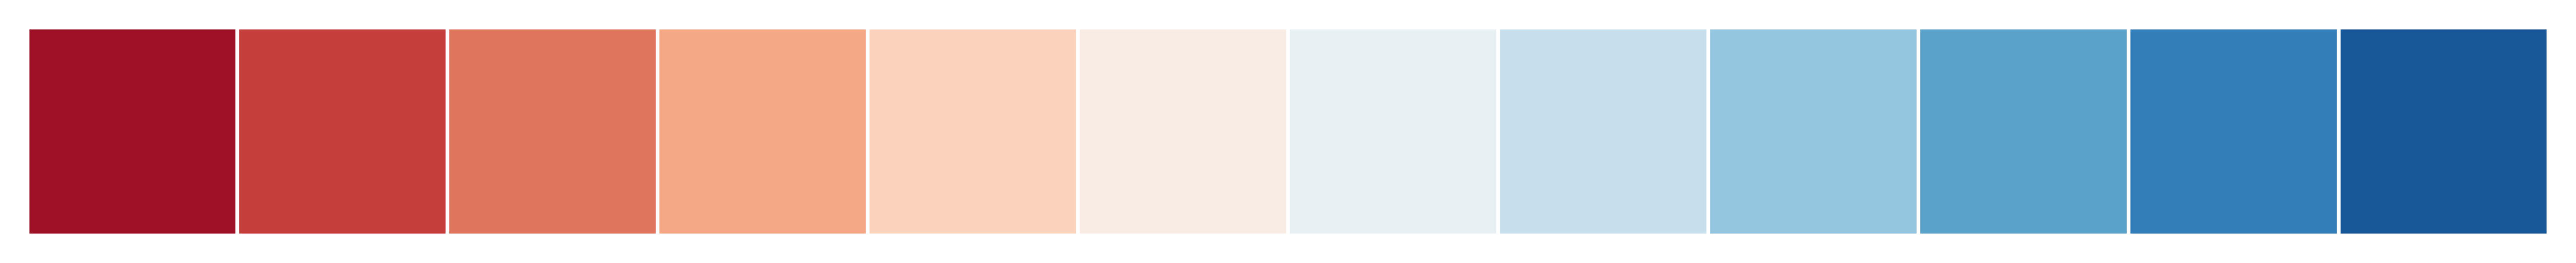

In [172]:
sns.palplot(sns.color_palette("RdBu",12))
